In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats


In [3]:
df = pd.read_csv('diabetes.csv')


In [4]:
# Display the first few rows of the dataframe
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

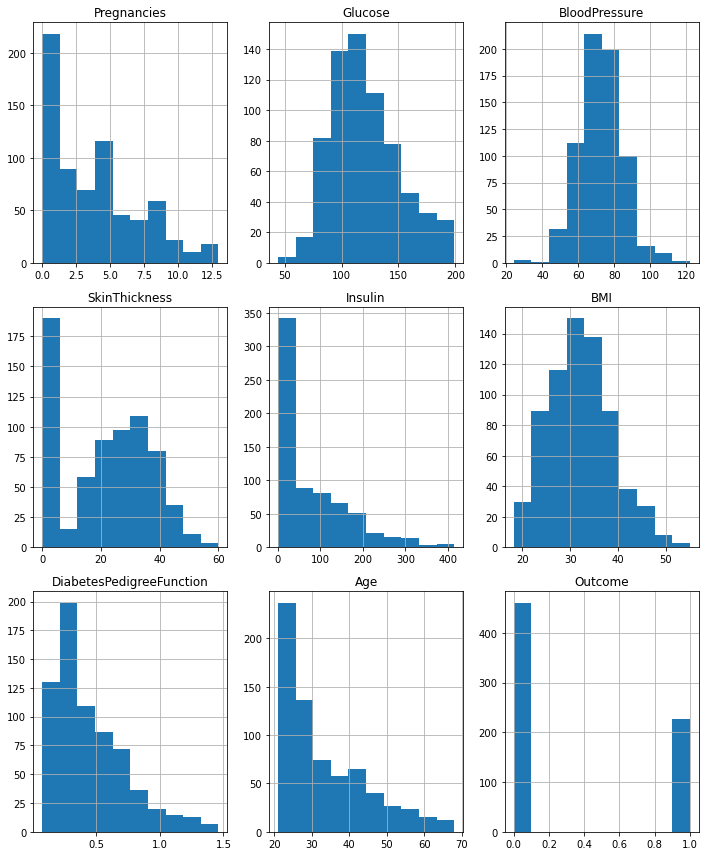

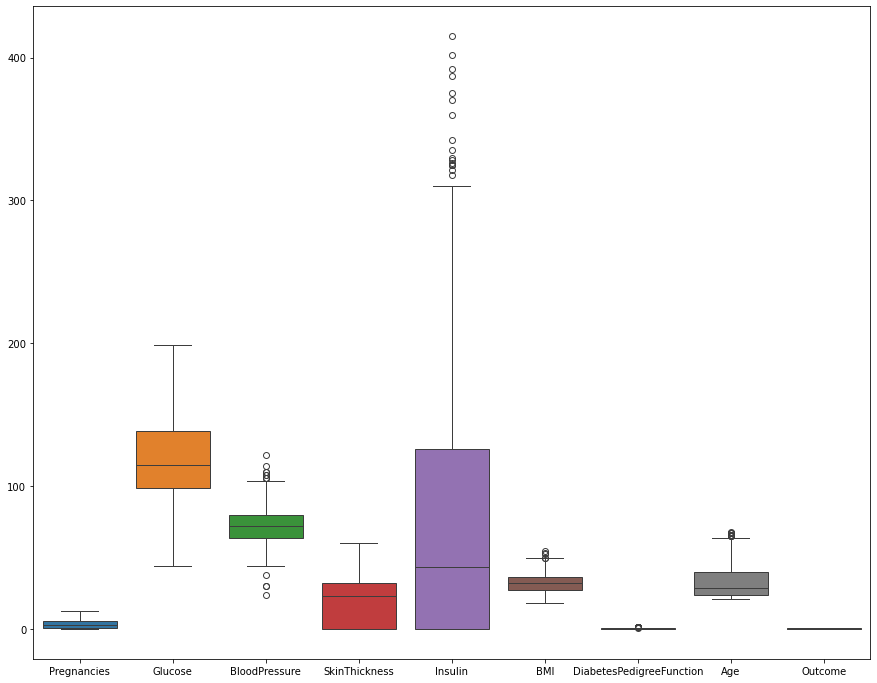

In [24]:
# Histogram for numeric variables
df.hist(figsize=(10, 12))
plt.tight_layout()
plt.show()

# Boxplot for numeric variables
plt.figure(figsize=(15, 12))
sns.boxplot(data=df)
plt.show()

<Figure size 720x864 with 0 Axes>

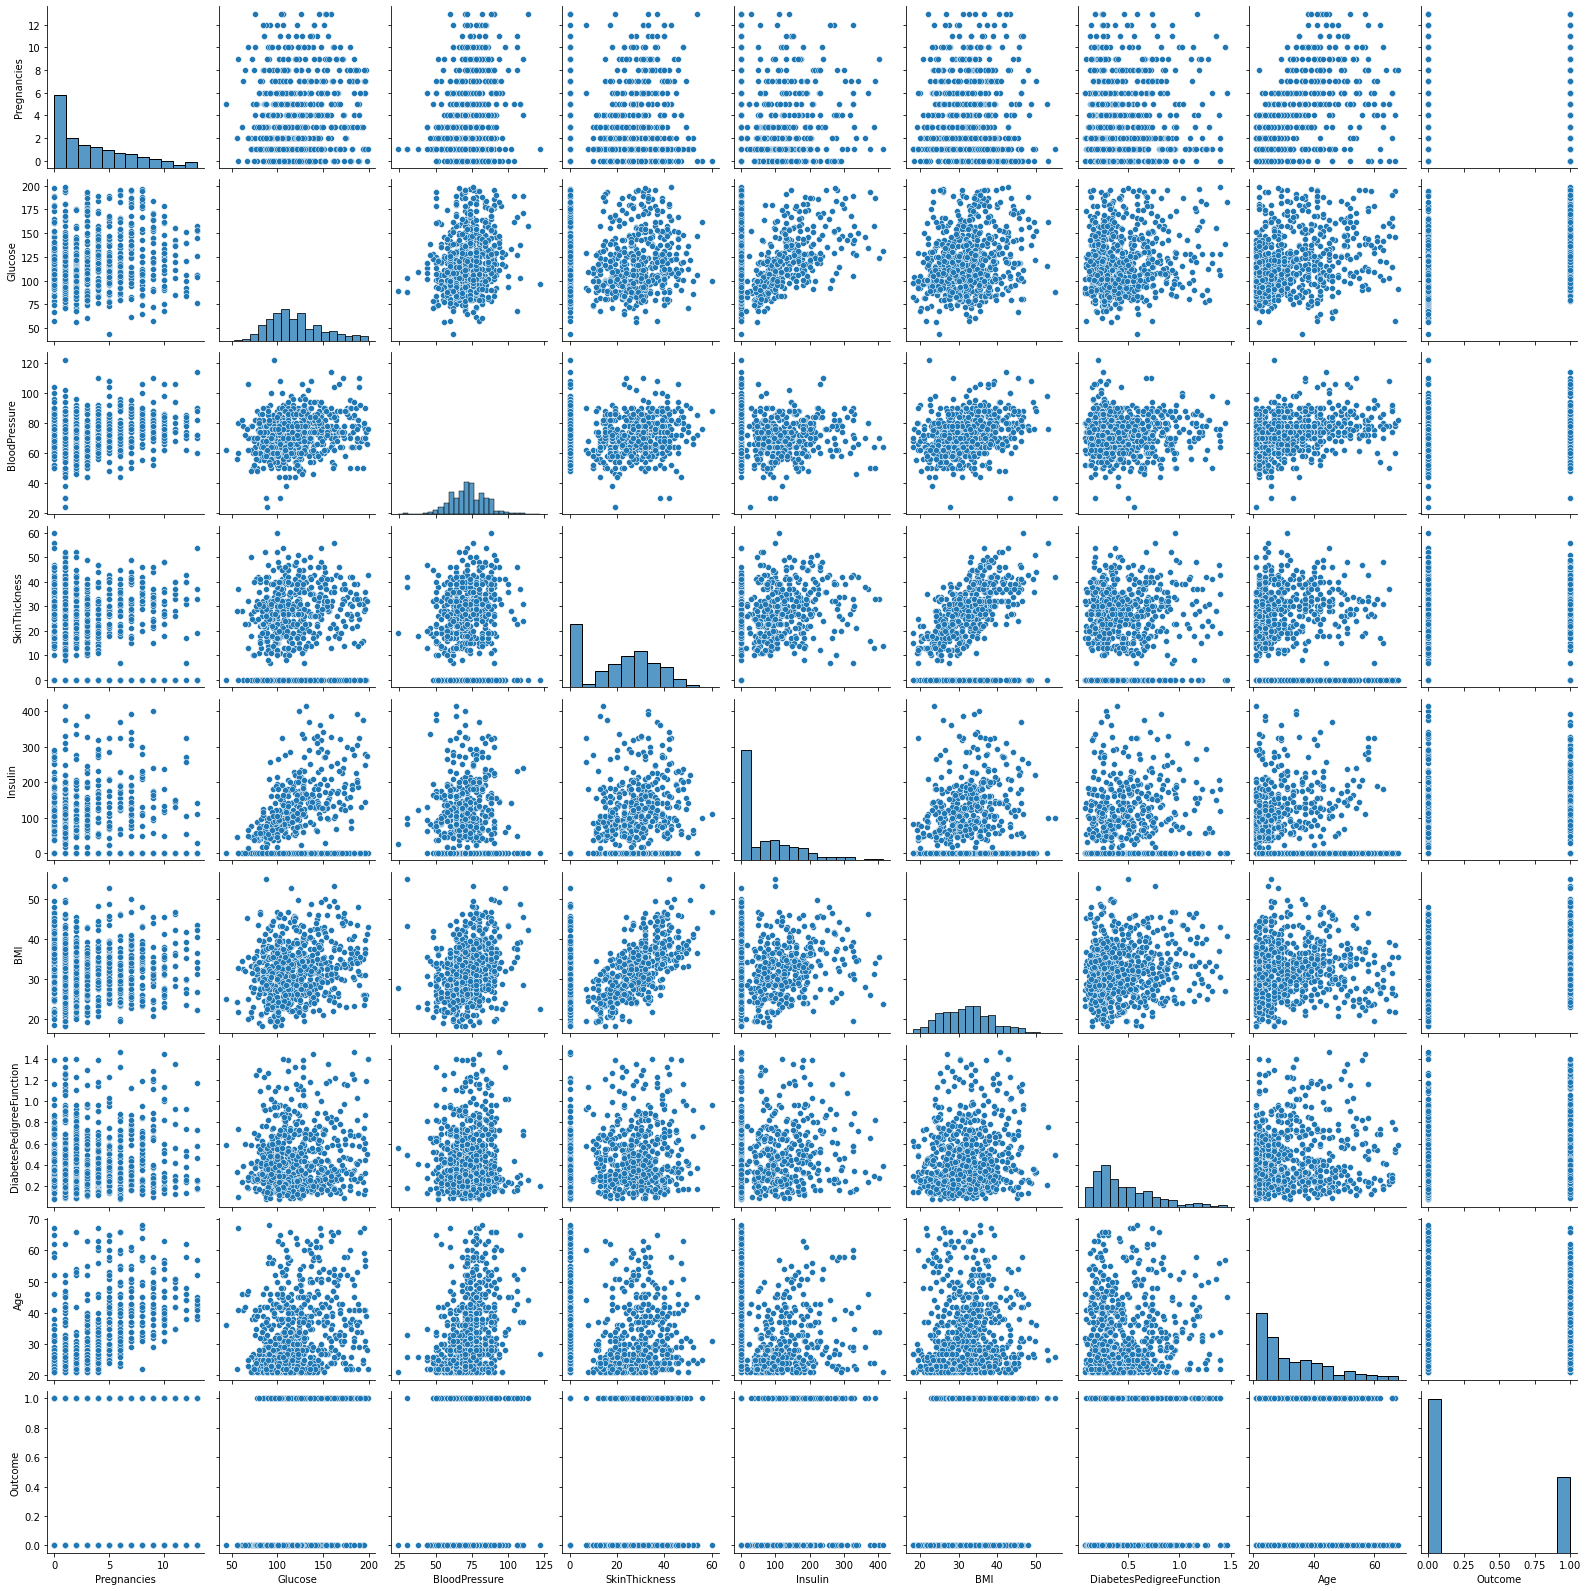

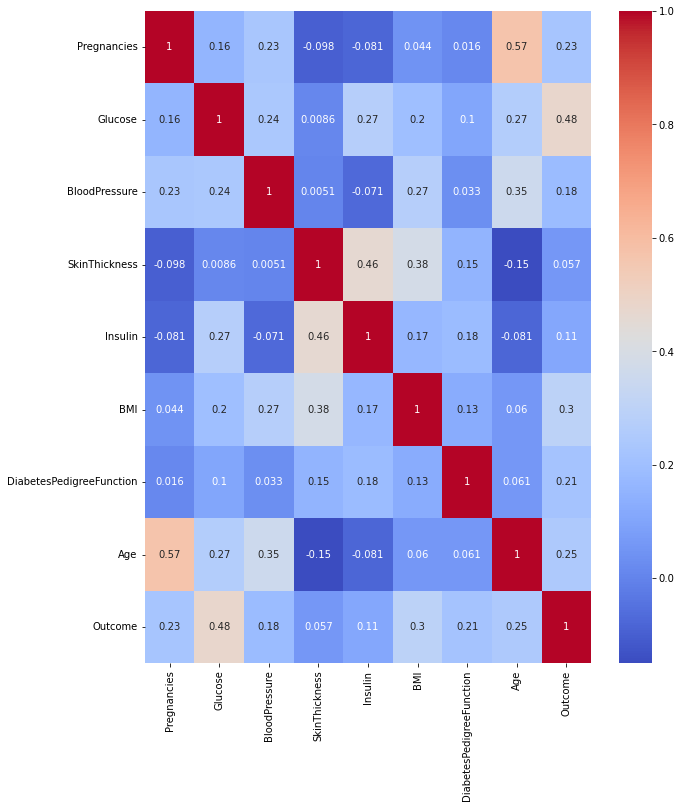

In [26]:
# Pairplot for numeric variables
plt.figure(figsize=(10,12))
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [27]:
missing_values = df.isnull().sum()

In [29]:
missing_values

Pregnancies                 80
Glucose                     80
BloodPressure               80
SkinThickness               80
Insulin                     80
BMI                         80
DiabetesPedigreeFunction    80
Age                         80
Outcome                     80
dtype: int64

In [31]:
from sklearn.experimental import enable_iterative_imputer  # Import necessary for IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)  # You can adjust max_iter as needed

# Columns with missing values
columns_with_missing = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_with_missing]), columns=columns_with_missing)

# Update the original dataframe with imputed values
df[columns_with_missing] = df_imputed

# Now your dataframe df should have missing values imputed using MICE


In [33]:
# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [49]:
df.head()
df['Outcome'] = df['Outcome'].astype(int)

In [50]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [52]:
print("Descriptive Statistics:")
print(df[numerical_cols].describe())

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845930  118.486313      71.976983      20.787791   64.250757   
std       3.103531   25.625912       9.846816      14.579862   71.135836   
min       0.000000   56.000000      46.000000       0.000000    0.000000   
25%       1.000000  100.000000      66.000000       7.750000    0.000000   
50%       3.845930  120.000000      72.345930      20.787791   61.500000   
75%       6.000000  130.000000      78.000000      32.000000  105.000000   
max      13.000000  187.000000      96.000000      60.000000  285.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.950955                  0.418339   32.259841  
std      5.868436                  0.209405    9.575064  
min     18.200000                  0.078000   21.000000  
2

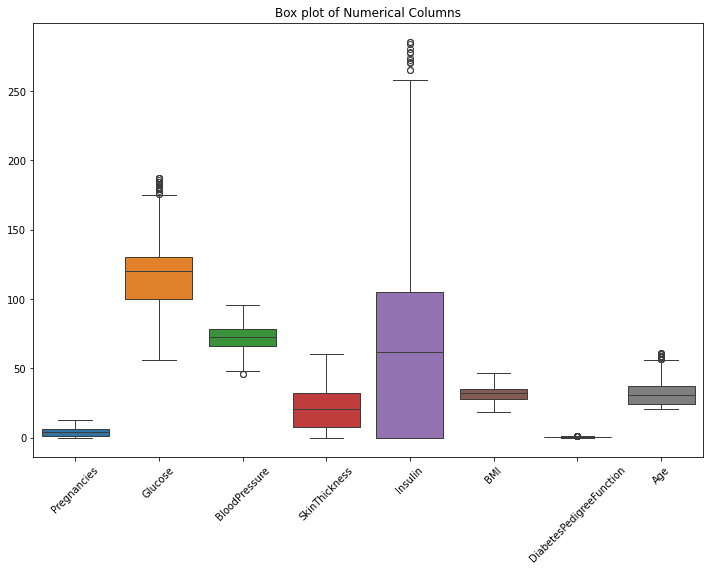

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [54]:
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = abs(z_scores)
outlier_rows_zscore = (abs_z_scores > 3).any(axis=1)
print("Outliers using Z-Score method:")
print(df[outlier_rows_zscore])

Outliers using Z-Score method:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
115          4.0    146.0           92.0            0.0      0.0  31.2   
144          4.0    154.0           62.0           31.0    284.0  32.8   
162          0.0    114.0           80.0           34.0    285.0  44.2   
206          8.0    120.0           76.0           29.0    280.0  37.5   
223          7.0    142.0           60.0           33.0    190.0  28.8   
279          2.0    108.0           62.0           10.0    278.0  25.3   
388          5.0    144.0           82.0           26.0    285.0  32.0   
755          1.0    128.0           88.0           39.0    110.0  36.5   

     DiabetesPedigreeFunction   Age  Outcome  
115                     0.539  61.0        1  
144                     0.237  23.0        0  
162                     0.167  27.0        0  
206                     0.605  57.0        1  
223                     0.687  61.0        0  
279                 

Outliers using IQR method:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            8.0    183.0           64.0            0.0      0.0  23.3   
12          10.0    139.0           80.0            0.0      0.0  27.1   
28          13.0    145.0           82.0           19.0    110.0  22.2   
30           5.0    109.0           75.0           26.0      0.0  36.0   
35           4.0    103.0           60.0           33.0    192.0  24.0   
..           ...      ...            ...            ...      ...   ...   
707          2.0    127.0           46.0           21.0     62.0  34.4   
715          7.0    187.0           50.0           33.0     62.0  33.9   
716          3.0    173.0           78.0           39.0    185.0  33.8   
748          3.0    187.0           70.0           22.0    200.0  36.4   
755          1.0    128.0           88.0           39.0    110.0  36.5   

     DiabetesPedigreeFunction   Age  Outcome  
2                      0.6720  32.0  

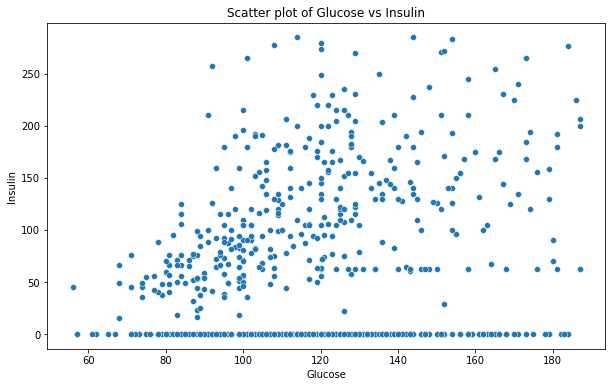

In [55]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_rows_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)
print("Outliers using IQR method:")
print(df[outlier_rows_iqr])

# Visualization (scatter plot for two variables)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Scatter plot of Glucose vs Insulin')
plt.show()








In [56]:
# Replace outliers with median value
for col in numerical_cols:
    median = df[col].median()
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)


In [57]:
# Split the DataFrame into features (independent variables) and target (dependent variable)
X = df.iloc[:, :-1]  # Selects all rows and all columns except the last one (Outcome)
y = df.iloc[:, -1]   # Selects all rows and only the last column (Outcome)

# Now you can proceed with the splitting


In [82]:
y_df = pd.DataFrame(y, columns=['Outcome'])

# Count the occurrences of each class
class_counts = y_df['Outcome'].value_counts()

# Print the class counts
print(class_counts)

Outcome
0    541
1    227
Name: count, dtype: int64


In [84]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples for X and y
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print(pd.Series(y_resampled).value_counts())


Outcome
1    541
0    541
Name: count, dtype: int64


In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already applied resampling to X_resampled and y_resampled

# Step 1: Split the resampled dataset into a training set and a test set
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Define the decision tree model
dt_classifier = DecisionTreeClassifier()

# Step 3: Use cross-validation to optimize hyperparameters
# For example, let's optimize the maximum depth of the tree
max_depth_values = range(1, 11)
cv_scores = []
for max_depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal max_depth value
optimal_max_depth = max_depth_values[cv_scores.index(max(cv_scores))]
print(f"Optimal max_depth: {optimal_max_depth}")

# Step 4: Train the model on the resampled training set using the optimized hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Optimal max_depth: 7
Accuracy on the test set: 0.728110599078341


Accuracy: 0.728110599078341
Precision: 0.7037037037037037
Recall: 0.7378640776699029
F1 Score: 0.7203791469194312
Confusion Matrix:
[[82 32]
 [27 76]]


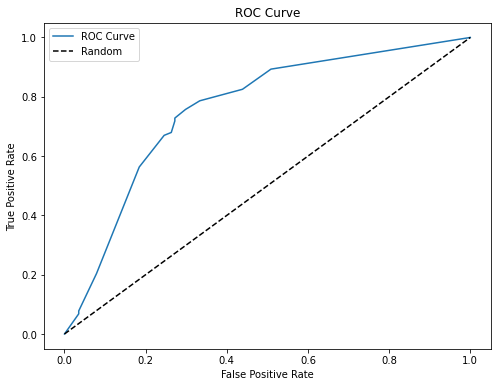

ROC AUC Score: 0.760304888434679


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 2: Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Step 3: Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Step 4: Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Step 5: Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Plot ROC curve
y_probs = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 7: Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid to search
param_grid = {
    'max_depth': [1,2,3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with 'sqrt', 'log2', or None
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the scoring metric
scorer = make_scorer(f1_score)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a decision tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_dt_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score on Test Set:", f1)


Best Hyperparameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
F1 Score on Test Set: 0.6


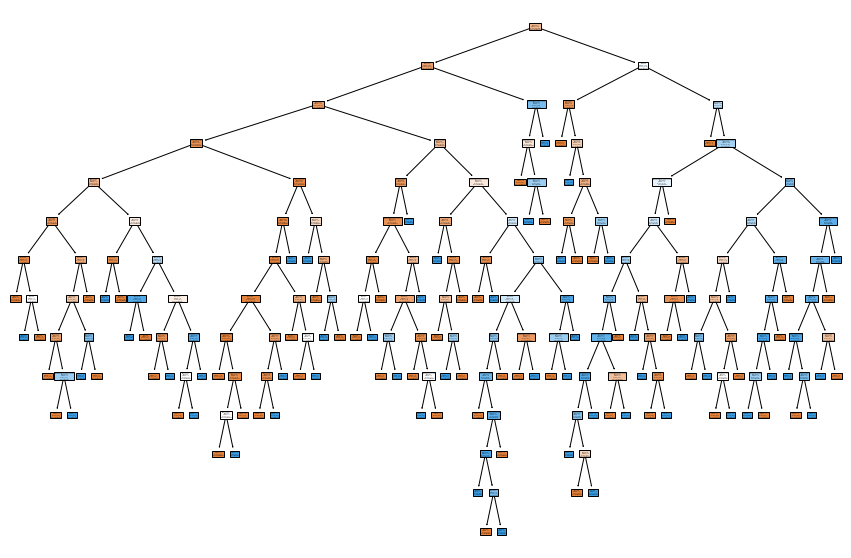

Feature Importance:
Glucose: 0.21783385440556155
Age: 0.1774821182616658
BMI: 0.16408815838432733
DiabetesPedigreeFunction: 0.15585680278913713
Pregnancies: 0.09152880391670497
SkinThickness: 0.0891244863941119
Insulin: 0.05958779242075369
BloodPressure: 0.044497983427737524
Feature: Pregnancies - Importance: 0.09152880391670497
Feature: Glucose - Importance: 0.21783385440556155
Feature: BloodPressure - Importance: 0.044497983427737524
Feature: SkinThickness - Importance: 0.0891244863941119
Feature: Insulin - Importance: 0.05958779242075369
Feature: BMI - Importance: 0.16408815838432733
Feature: DiabetesPedigreeFunction - Importance: 0.15585680278913713
Feature: Age - Importance: 0.1774821182616658


In [94]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier with training data
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

# Identify Important Features
importance = dt_classifier.feature_importances_
feature_names = X.columns
feature_importance = dict(zip(feature_names, importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# Analyze Splits and Thresholds
def analyze_tree(tree, feature_names):
    for i, feature in enumerate(feature_names):
        thresholds = tree.tree_.threshold[i]
        if len(thresholds) > 0:
            print(f"Feature: {feature}")
            print(f"Thresholds: {thresholds}")

def analyze_tree(tree, feature_names):
    tree_feature_importance = tree.feature_importances_
    for i, importance in enumerate(tree_feature_importance):
        if importance > 0:
            print(f"Feature: {feature_names[i]} - Importance: {importance}")

analyze_tree(dt_classifier, X.columns)


In [99]:
df.reset_index(drop=True, inplace=True)

In [104]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



# Define a function for sensitivity analysis
def sensitivity_analysis(model, X, y):
    # Vary hyperparameters or input features and observe changes in performance
    # For example, you can change the max_depth or min_samples_leaf of the decision tree
    # and evaluate the performance on the test set
    
    # Example:
    if model.max_depth is not None:
        model.max_depth += 1
    else:
        model.max_depth = 1
    y_pred = model.predict(X)
    print("Updated Model Performance:")
    print(classification_report(y, y_pred))

# Define a function for scenario testing
def scenario_testing(model, X, y):
    # Introduce noise or outliers to the input data and observe the model's behavior
    # For example, add random noise to a subset of features and evaluate the performance
    
    # Example:
    X_noisy = X.copy()
    noisy_indices = np.random.choice(X_noisy.shape[0], int(X_noisy.shape[0]*0.1), replace=False)
    X_noisy[noisy_indices] += np.random.normal(0, 0.5, X_noisy[noisy_indices].shape)
    
    y_pred_noisy = model.predict(X_noisy)
    print("Model Performance with Noisy Data:")
    print(classification_report(y, y_pred_noisy))

# Define cross-validation function
def cross_validate(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Cross-Validation Fold:")
        print(classification_report(y_test, y_pred))

# Call the functions
sensitivity_analysis(dt_classifier, X_test, y_test)
scenario_testing(dt_classifier, X_test, y_test)
cross_validate(dt_classifier, X, y)


Updated Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       114
           1       0.84      0.72      0.77       103

    accuracy                           0.80       217
   macro avg       0.81      0.80      0.80       217
weighted avg       0.81      0.80      0.80       217



KeyError: "None of [Index([197,  10,  78,  85,  95,  74, 191,  73,  92,  87,  52,  39, 144, 201,\n        82, 214,  36,  79,  48,  20, 213],\n      dtype='int32')] are in the [columns]"

It looks like updated model's performance metrics have improved. Here's a breakdown of the metrics:

- **Precision**: For class 0 (No Diabetes), precision is 0.78, and for class 1 (Diabetes), precision is 0.84. This indicates that when the model predicts a certain class, it is correct around 78% of the time for class 0 and around 84% of the time for class 1.

- **Recall**: For class 0, recall is 0.88, and for class 1, recall is 0.72. Recall represents the proportion of actual positive cases that were correctly identified by the model. A recall of 0.88 for class 0 means that 88% of actual class 0 instances were correctly identified by the model, and a recall of 0.72 for class 1 means that 72% of actual class 1 instances were correctly identified by the model.

- **F1-score**: F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 0.82, and for class 1, the F1-score is 0.77. F1-score provides a balance between precision and recall.

- **Accuracy**: Overall accuracy of the model is 0.80, indicating that around 80% of the predictions made by the model are correct.

- **Macro Avg and Weighted Avg**: These are the averages of precision, recall, and F1-score across all classes. Macro avg gives equal weight to each class, while weighted avg considers the support (number of true instances) for each class.

Overall, with improved precision, recall, and F1-score, as well as a decent accuracy, the updated model appears to perform better than the previous one.